# <u><center><font color='teal'>Course 2: Convolutional Neural Networks CNN in TensorFlow</font></center></u> 

# <font color='teal'>Week 3: Using Transfer Learning</font>

The Deep Neural Network Model is improved by using the following:


Real-world images aren't like that -- they're in different shapes, aspect ratios etc, and they're usually in color!

To improve the Deep Neural Network performance (reduce overfitting, increse the nmber of training images) you will use Image Augmentation.

You'll follow these steps:

    **PART 1 Implementing Transfer Learning**
    1.1. Download Pre-Trained inception CNN
    1.2. Load Pre-Trained inception CNN
    1.3. Freeze or lock layers in the Pre-Trained inception CNN
    1.4. Optional. Check Summary of the CNN (WARNING: it could be extremely large)
    1.5. Check the Last Layer of the Pre-Trained inception CNN
    
    
    **PART 2 Add Your Deep Convolutional Neural Network DCNN**
    2.1. Use the Last Layer of the Pre-Trained inception CNN as inpt layer in your DCNN
    2.2. Add layers to your DCNN 
    2.3. Dropout Neurons (prevent layers with similar weights) in your DCNN 
    2.4. Compile your DCNN
    2.5. Download Training and Validation images of your dataset
    2.6. Introduce Image Augmentation to the images of your dataset
    2.7. Fit your DCNN
    2.8. Evaluate Opverfiting in your DCNN: Learning curves
    2.9. Predict
    
   

## <font color='teal'>PART 1: Coding Transfer Learnng</font>



<font color='maroon'>
========================================================================

**IMPORTANT: USE THIS CODE WHEN WORKING WITH JUPYTER IN GOOGLE COLAB** 
</font>

In [ ]:
###############################################################################
###############################################################################
##                                                                           ##
##    IMPORTANT: USE THIS CODE WHEN WORKING WITH JUPYTER in GOOGLE COLAB     ##
##                                                                           ##
###############################################################################
###############################################################################

#**************************************************************************
#         1.1. Downloading the pre-trained inception CNN
#**************************************************************************
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

    
#**************************************************************************
#         1.2. Loading pre-trained inception CNN
#**************************************************************************
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


# Keras has an inception NN, so you use that, 
#      let's instantiate that model
#  NOTE: The inception V3 has a fully-connected layer at the top. So by setting include_top to false, 
#        you're specifying that you want to ignore this and get straight to the convolutions. 
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), # desire input shape
                                include_top = False,         # do not include the fullu-concentrated top layer
                                weights = None)              # dont want the built-in weights 
                                                             #      only a snapshop of the NN model
pre_trained_model.load_weights(local_weights_file)


#**************************************************************************
#         1.3. Freezing of locking the layers of the pre-trained inception CNN
#**************************************************************************
for layer in pre_trained_model.layers:
  layer.trainable = False


#**************************************************************************
#         1.4. Summary of the pre-trained inception CNN
#**************************************************************************
# The summary of this model is huge, so we dont print it
# pre_trained_model.summary()


#**************************************************************************
#         1.5. Check the Last Layer of the Pre-Trained inception CNN
#**************************************************************************
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

<font color='maroon'>
========================================================================

**IMPORTANT: USE THIS CODE WHEN WORKING WITH JUPYTER LOCALLY** 
</font>


In [1]:
###############################################################################
###############################################################################
##                                                                           ##
##       IMPORTANT: USE THIS CODE WHEN WORKING WITH JUPYTER LOCALLY          ##
##                                                                           ##
###############################################################################
###############################################################################



# REQUIRE INSTALLATION PACKAGES Through Conda or pip
#    numpy
#    matlipplot
#    tensorlow            => used for Deep Neural Networks
#    tensorlow-datasets   => used for Deep Neural Networks
#    keras                => used for Deep Neural Networks
#    pillow               => to process image files in PIL format
#    glob, glob2          => to retrieve files/pathnames matching 
#                               a specified pattern (extension, name, etc).


#**************************************************************************
#         1.1. Downloading the pre-trained inception CNN
#**************************************************************************

# Install pywget with conda or with pip
!pip install wget
import wget

import os
import os.path
from os import path

# file with training and validation images
local_fn   = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# A copy of the pre-trained neural network is saved in this URL
url ='https://storage.googleapis.com/mledu-datasets/'

# Local path where the pre-trained model will be downloaded
local_path = ('O:/A_DSci/Coursera/deeplearning.ai/TF_Pract_Specialization/C2 CNN_in_TF/W3')


# Download image files only once
# 1rst check wheather the directory exist
if path.isdir(local_path): 
    # check whether the file exist
    if not path.isfile(os.path.join(local_path, local_fn)):
        # zip File does not exist, then download
        # NOTE wget doesnt support the new pthlib.Path so paths are
        #      hardcoded the old way
        wget.download(url + local_fn, os.path.join(local_path , local_fn))

        #!wget --no-check-certificate \
        #https://storage.googleapis.com/mledu-datasets/ \
        #inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
        #-O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
        print("\n ==> Image file '" + local_fn + "' downloaded succesfully")
    else:
        print("\n ==> Image file '" + local_fn + "' already downloaded")
else:
    print("\n ==> Directory path does not exist")

    
    
#**************************************************************************
#         1.2. Loading pre-trained inception CNN
#**************************************************************************
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Keras has an inception NN, so you use that, 
#      let's instantiate that model
#  NOTE: The inception V3 has a fully-connected layer at the top. So by setting include_top to false, 
#        you're specifying that you want to ignore this and get straight to the convolutions. 
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), # desire input shape
                                include_top = False,         # do not include the fullu-concentrated top layer
                                weights = None)              # dont want the built-in weights 
                                                             #      only a snapshop of the NN model

pre_trained_model.load_weights(os.path.join(local_path , local_fn))



#**************************************************************************
#         1.3. Freezing of locking the layers of the pre-trained inception CNN
#**************************************************************************
# Especify you will NOT train the layesr of the instantiated NN model 
for layer in pre_trained_model.layers:
    layer.trainable = False


#**************************************************************************
#         1.4. Summary of the pre-trained inception CNN
#**************************************************************************
# The summary of this model is huge, so we dont print it
#pre_trained_model.summary()


#**************************************************************************
#         1.5. Check the Last Layer of the Pre-Trained inception CNN
#**************************************************************************
last_layer = pre_trained_model.get_layer('mixed7')
print('\n==> last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output



 ==> Image file 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5' already downloaded

==> last layer output shape:  (None, 7, 7, 768)


## <font color='teal'>PART 2: Add Your Deep Convolutional Neural Network</font>

#### Convolutional Neural Networks CNN <u>WITH</u> Image Augmentation. Cats vs Dogs Small Dataset



In [3]:
import tensorflow as tf
from tensorflow import keras
print("TensorFlow VErsion: ", tf.__version__)


from tensorflow.keras.optimizers import RMSprop


DESIRED_ACCURACY = 0.95

class myCallback(tf.keras.callbacks.Callback):
    # Your Code
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy') > DESIRED_ACCURACY):  # use outside Google Colab
#            if(logs.get('acc') > DESIRED_ACCURACY):       # use inside Google Colab          
            print("\nReached desired Accuracy of " + DESIRED_ACCURACY + "% so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()



#**************************************************************************
#         2.1. Use the Last Layer of the Pre-Trained inception CNN as inpt layer in your DCNN
#**************************************************************************
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)


#**************************************************************************
#         2.2. Add layers to your DCNN 
#**************************************************************************
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)


#**************************************************************************
#         2.3. Dropout Neurons (prevent layers with similar weights) in your DCNN 
#**************************************************************************
# Add a dropout rate of 0.2 (fraction of units to drop 0 to 11)
x = layers.Dropout(0.2)(x)   # droping 20% of the neurons    


# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 


#**************************************************************************
#         2.4 Compile your DCNN
#**************************************************************************
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


TensorFlow VErsion:  2.1.0


In [4]:
  
#**************************************************************************
#         2.5. Download Training and Validation images of your dataset
#**************************************************************************



# REQUIRE INSTALLATION PACKAGES Through Conda or pip
#    numpy
#    matlipplot
#    tensorlow            => used for Deep Neural Networks
#    tensorlow-datasets   => used for Deep Neural Networks
#    keras                => used for Deep Neural Networks
#    pillow               => to process image files in PIL format
#    glob, glob2          => to retrieve files/pathnames matching 
#                               a specified pattern (extension, name, etc).


# Install pywget with conda or with pip
!pip install wget
import wget

import os
import os.path
from os import path


# zip file with training and validation images
zip_fn   = 'cats_and_dogs_filtered.zip'
zip_dirn = 'cats_and_dogs_filtered'

# A filtered version of the Kaggle's cats-dogs dataset
url ='https://storage.googleapis.com/mledu-datasets/'

local_path = ('O:/A_DSci/Coursera/deeplearning.ai/TF_Pract_Specialization/C2 CNN_in_TF/W2')


# Download image files only once
# 1rst check wheather the directory exist
if path.isdir(local_path): 
    # check whether the file exist
    if not path.isfile(os.path.join(local_path, zip_fn)):
        # zip File does not exist, then download
        # NOTE wget doesnt support the new pthlib.Path so paths are
        #      hardcoded the old way
        wget.download(url + zip_fn, local_path + '/' + zip_fn)

        #!wget --no-check-certificate \
        #  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
        #  -O /tmp/cats_and_dogs_filtered.zip
        print("\n ==> Image file '" + zip_fn + "' downloaded succesfully")
    else:
        print("\n ==> Image file '" + zip_fn + "' already downloaded")
else:
    print("\n ==> Directory path does not exist")


 ==> Image file 'cats_and_dogs_filtered.zip' already downloaded


In [5]:
import os, sys
import zipfile
from os import path, getcwd, chdir

# Unziping TRAINING images
local_zip = os.path.join(local_path, zip_fn)
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(local_path)
zip_ref.close()

base_dir = os.path.join(local_path, zip_dirn)

# Directories with training and validation pictures
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
valid_cat_dir = os.path.join(valid_dir, 'cats')
valid_dog_dir = os.path.join(valid_dir, 'dogs')

print(train_cat_dir)
print('\n')
print(valid_cat_dir)

print('\n')
print('total training cat images :', len(os.listdir( train_cat_dir ) ))
print('total training dog images :', len(os.listdir( train_dog_dir ) ))

print('total validation cat images :', len(os.listdir( valid_dog_dir ) ))
print('total validation dog images :', len(os.listdir( valid_dog_dir ) ))

O:/A_DSci/Coursera/deeplearning.ai/TF_Pract_Specialization/C2 CNN_in_TF/W2\cats_and_dogs_filtered\train\cats


O:/A_DSci/Coursera/deeplearning.ai/TF_Pract_Specialization/C2 CNN_in_TF/W2\cats_and_dogs_filtered\validation\cats


total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [6]:

  
#**************************************************************************
#         2.6. Introduce Image Augmentation to the images of your dataset
#**************************************************************************



    

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Note that the validation data should not be augmented!
valid_datagen = ImageDataGenerator(rescale=1/255)

# Flow TRAINING images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,                 # This is the source directory for training images
    target_size=(150, 150),    # All images will be resized to 150x150
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')


# Flow VALIDATION images in batches of 20 using valid_datagen generator
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,                 # This is the source directory for training images
    target_size=(150, 150),    # All images will be resized to 150x150
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:


#**************************************************************************
#         2.7. Fit your DCNN
#**************************************************************************

history = model.fit(
    train_generator,
    steps_per_epoch=100,  # 2000 images = batch_size * steps
    epochs=20,
    verbose=2,
    validation_data=valid_generator,
    validation_steps=50,  # 1000 images = batch_size * steps
    callbacks=[callbacks])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 - 241s - loss: 0.5026 - accuracy: 0.7785 - val_loss: 0.5843 - val_accuracy: 0.8520
Epoch 2/20
100/100 - 234s - loss: 0.3780 - accuracy: 0.8255 - val_loss: 0.2765 - val_accuracy: 0.9320
Epoch 3/20
100/100 - 206s - loss: 0.3479 - accuracy: 0.8510 - val_loss: 0.5902 - val_accuracy: 0.9050
Epoch 4/20
100/100 - 191s - loss: 0.3433 - accuracy: 0.8550 - val_loss: 0.3951 - val_accuracy: 0.9260
Epoch 5/20
100/100 - 189s - loss: 0.2954 - accuracy: 0.8710 - val_loss: 0.7457 - val_accuracy: 0.9090
Epoch 6/20
100/100 - 189s - loss: 0.3398 - accuracy: 0.8590 - val_loss: 0.3758 - val_accuracy: 0.9430
Epoch 7/20
100/100 - 230s - loss: 0.2979 - accuracy: 0.8800 - val_loss: 0.3160 - val_accuracy: 0.9510
Epoch 8/20
100/100 - 211s - loss: 0.3033 - accuracy: 0.8740 - val_loss: 0.4835 - val_accuracy: 0.9370
Epoch 9/20
100/100 - 208s - loss: 0.3120 - accuracy: 0.8765 - val_loss: 0.2990 - val_accura

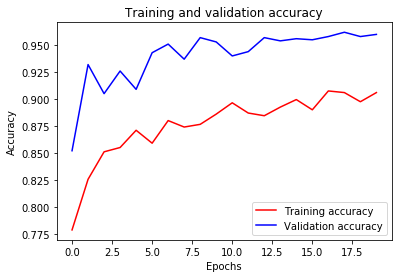

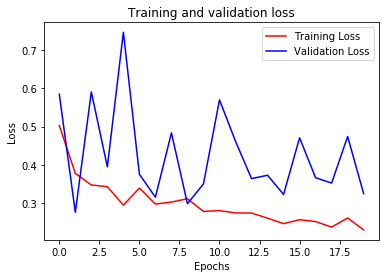

In [8]:


#**************************************************************************
#         2.8. Evaluate Opverfiting in your DCNN: Learning curves
#**************************************************************************


import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel("Epochs")
leg = plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
#plt.legend()
plt.ylabel('Loss')
plt.xlabel("Epochs")
leg = plt.legend()

plt.show()

#### Predicting: Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a cat or a dog.

(1) **Download images to local disck:** From <a href="https://pixabay.com/">Pixbay</a> download images of cats and dogs into your machine

(2) **Load images** loop through images located in a local directory
> **Modification for compress images:** Notice you must load the images with the same sise as those in the TRaining, Validation sets either 300x300 pixels or 150x150 pixels

(2a) **conver images to an Numpy array**

(2b) **Scale the Numpy array values** to facilitate work of gradient descent. RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, we will standardize values to be in the [0, 1] by using a Rescaling layer at the start of our model.

(2d) **Plot, print information of image**

(2e) **Show prediction results**




<font color='maroon'>
========================================================================

**IMPORTANT: USE THIS CODE WHEN WORKING WITH JUPYTER IN GOOGLE COLAB** 
</font>


In [ ]:
####################################################################
##                                                                ##
## ==> IMPORTANT: Use This When Working OUTSIDE GOOGLE COLAB      ##
##                                                                ##
##                   Reading image files                          ## 
##                                                                ##
####################################################################


#**************************************************************************
#         2.9. Predict
#**************************************************************************


import glob, os
from keras.preprocessing import image
import numpy as np

EXTENSION = '.jpg'

# Location of images (*.png) in the local disk 
path_images = "O:/A_DSci/Coursera/deeplearning.ai/TF_Pract_Specialization/C2 CNN_in_TF/W2/Test_Images"


filenames = []
for file in os.listdir(path_images) :
    filename = os.fsdecode(file)
    
    if filename.endswith( (EXTENSION) ): # whatever file types you're using...
        filenames.append(filename)
        
        # LOADING THE IMAGE with unique saze os (150x150 pixels)
        img   = image.load_img(os.path.join(path_images, filename) ,target_size=(150,150))
        # CONVERTING TO A Numpy ARRAY
        x    = image.img_to_array(img)
        
        # SCALING THE DATA: This should divide the immage array values 
        #                     by the maximum value (255)
        x    = x/np.amax(x) 


        # PLOTTING the image
        fig = plt.figure()
        plt.subplot(1,1,1)                      # grid of 2rows, 1column, 1stPlot
        plt.imshow(x, interpolation='none')
        #plt.title(filepath.split('/')[-1])
        plt.title(filename)
        plt.xticks([])                          # taking ticks off
        plt.yticks([])                          # taking ticks off    
        plt.show()

        print('IMAGE INFO: Format: {}; Mode: {}; Loaded as size: {}; Arryshape {}'.format(
            img.format, img.mode, img.size, x.shape))


        # REDIMESIONING to fit the Neural Network model
        #               The image should have 3dimensions: 
        #              (lenght x width)pixels times the channels (RGB, RGBA, etc)
        x    = np.expand_dims(x, axis=0)


        # STACKING the arrays
        images  = np.vstack([x])

        # PREDICTING
        classes = model.predict(images, batch_size=10)
        print('classes[0] => ', classes[0])
        if classes[0]>0:
            print('\nimage file => ' + filename + '  is a dog')
        else:
            print('\nimage file => ' + filename + '  is a cat')

if len(filenames)==0:
    print("====>> There are no images with extension " + "/*" + EXTENSION + " <<=====" )


<font color='maroon'>
========================================================================

**IMPORTANT: USE THIS CODE WHEN WORKING WITH JUPYTER LOCALLY** 
</font>

In [ ]:


####################################################################
##                                                                ##
## ==> IMPORTANT: Use This When Working INSIDE GOOGLE COLAB       ##
##                                                                ##
##                   Reading image files                          ## 
##                                                                ##
####################################################################


#**************************************************************************
#         2.9. Predict
#**************************************************************************



#Loading images from Google Colab to make predictions
!pip install google-colab

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    im   = image.load_img(path,target_size=(300,300))
    x    = image.img_to_array(img)
    x    = np.expand_dims(x, axis=0)
    
    images  = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print('classes[0] => ', classes[0])
    if classes[0]>0:
        print('\nimage file => ' + fn + '  is a dog')
    else:
        print('\nimage file => ' + fn + '  is a cat')
    